# Population/ RQ2 Analysis

# Purpose 
The purpose of this notebook is to analyise Population and Population Densitys effect on Rating Share. The Graphs created will be seen in both the presentation and the final report. Not everything in this notebook will be used in the final report and presentation. First we'll look at the games overall and then on a games by games basis. 

# Datasets
Uses: <br>
** pop.csv ** from 350_Pop_Prep <br>
Creates: <br>
An analysis of GDP including Markdown breakdowns of results as well as graphs showcasing results. 

In [58]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import matplotlib.patches as patches
import string
import sys, os
import seaborn as sns
import operator
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import warnings
from pandas.tools.plotting import table

# Setting out standard formatts for the Graphs below 

In [59]:
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=20, figsize=(18, 8))

In [60]:
# Ensure the file exists
if not os.path.exists(  r"..\..\data\final\populationA.csv" ):
    print("Missing dataset file")

In [61]:
# read the medal csv into a dataframe
df = pd.read_csv(  r"..\..\data\final\populationA.csv", encoding = "ISO-8859-1")

In [62]:
df.columns

Index(['Country', 'Host_City', 'Year', 'Gold_Share', 'Medal_Share',
       'Rating_Share', 'Males', 'Females', 'Summer', 'Winter',
       'Population_Density', 'Population', 'NOC_Males_Sent',
       'NOC_Females_Sent', 'NOC_Total_Sent', 'Female_Representation',
       'Male_Representation', 'Population_Representation', 'Norm_POP',
       'Norm_POPD', 'Norm_Gold_Share', 'Norm_Total_Medal_Share',
       'Norm_Rating_Share'],
      dtype='object')

# GDP Anaylsis 
For our RQ3 we are examining the effect that Population might have on a countries Rating share in the Olympics. We will do this analysis in this order. 
* Population Range
* Population Distribution 
* Ratings over Population
* Outliers
* Effect 
 - GDP
 - GDP wihtout Outliers
 - GDP per Capita 
 - GDP per capita without Outliers 


# Population Range 
First we'll get values for our range which will be the max Pop, the min Pop and the mean Pop then we can plot them on a bar chart. 

In [63]:
df1 = df

In [64]:
# Getting Range values 
rangeArr = df1.sort_values('Population').reset_index().iloc[[0,-1]].set_index('Country').Population
rangeArr['Mean'] = df1.Population.mean()
rangeArr

Country
Liechtenstein    2.392600e+04
China            1.378665e+09
Mean             6.314859e+07
Name: Population, dtype: float64

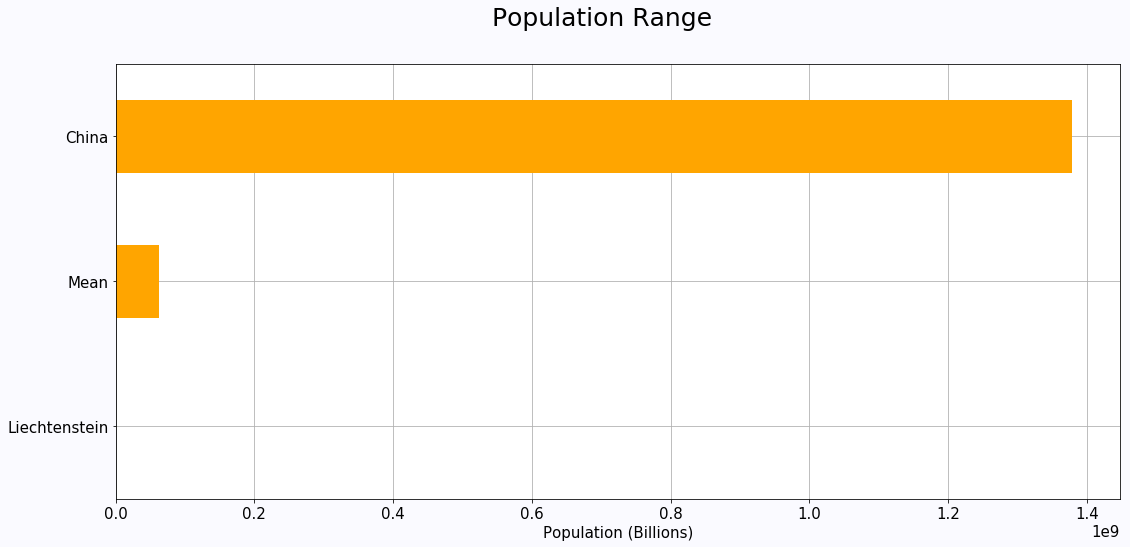

In [65]:
# Plotting the range 
fig, ax = plt.subplots(facecolor='#fafaff')

rangeArr.sort_values().plot(kind='barh',color='Orange')

plt.grid()
plt.xlabel('Population (Billions)')
plt.ylabel('')
fig.suptitle('Population Range', fontsize=25)
ax.set_axisbelow(True)


plt.show()
fig.savefig('../../data/final/Graphs/PopRange.png')

# Population Distribution 
In order to showcase the Population distribution we will plot the Population column on a histogram and show the mean Population with a black dotted line in the graph. 

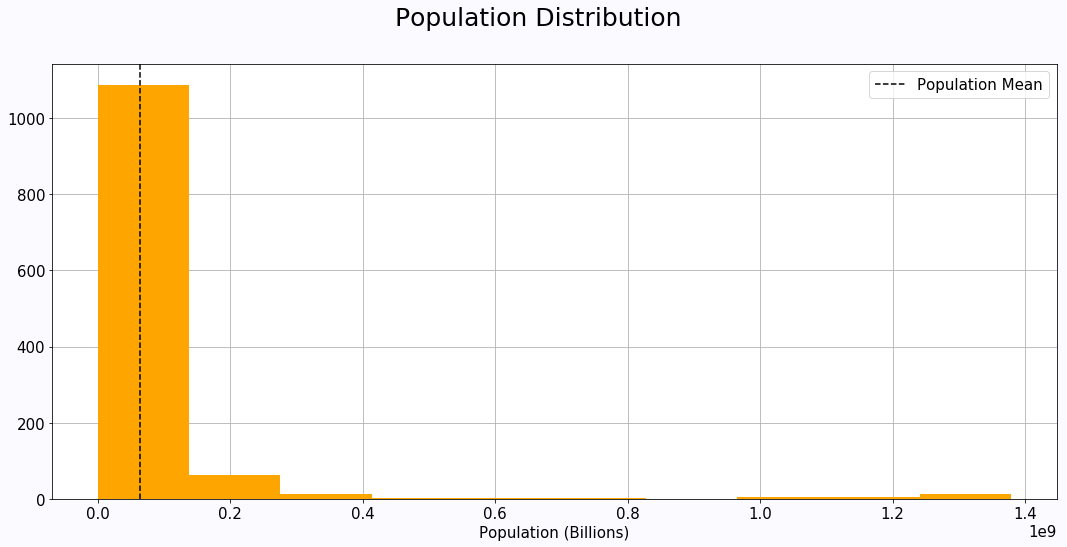

In [66]:
fig, ax = plt.subplots(facecolor='#fafaff')
df1.Population.hist(color='Orange')


plt.axvline(x=df1.Population.mean(),color='black',label='Population Mean',linestyle='--')

plt.legend()
plt.xlabel('Population (Billions)')
fig.suptitle('Population Distribution', fontsize=25)
ax.set_axisbelow(True)

plt.show()
fig.savefig('../../data/final/Graphs/PopDist.png')

# Ratings over GDP Per Capita

In [67]:
df1['Rating_Share_Capita'] = df1.Rating_Share/df1.Population

In [68]:
temp = df1.groupby(['Country'])['Rating_Share_Capita'].mean().sort_values()
ten = df1.groupby(['Country'])['Rating_Share_Capita'].mean().sort_values().tail(10)
ten['United States'] = temp.loc['United States']
ten['Soviet Union'] = temp.loc['Soviet Union']

In [69]:
ten = ten.sort_values()

In [70]:
ten

Country
United States            5.278466e-10
Soviet Union             1.021618e-09
Virgin Islands (U.S.)    6.248370e-09
Finland                  6.724367e-09
Bermuda                  7.254725e-09
Iceland                  8.053206e-09
Bahamas, The             9.747598e-09
Norway                   1.075100e-08
Fiji                     1.082393e-08
Montenegro               1.173408e-08
Luxembourg               1.574001e-08
Liechtenstein            3.299798e-07
Name: Rating_Share_Capita, dtype: float64

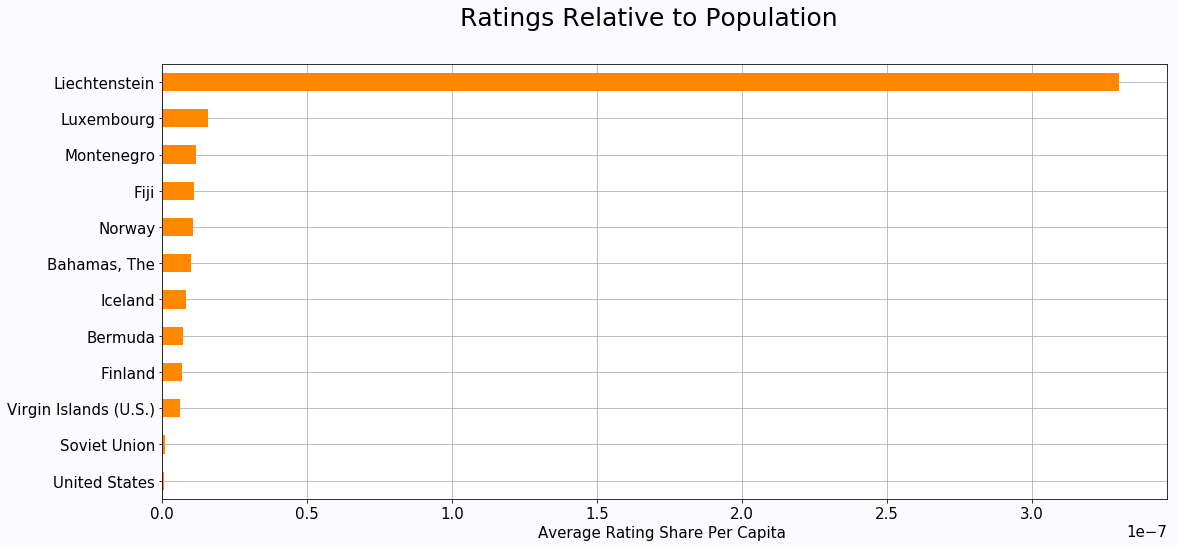

In [71]:
fig, ax = plt.subplots(facecolor='#fafaff')

ten.sort_values().plot(kind='barh',ax=ax,color='#ff8800')


plt.grid()
plt.ylabel('')
plt.xlabel('Average Rating Share Per Capita ')
ax.set_axisbelow(True)
fig.suptitle('Ratings Relative to Population', fontsize=25)
plt.show()

fig.savefig('../../data/final/Graphs/AveRatingPerCaptia.png')

# Ratings average over Population Density
* Not sure if it makes sense to put rating share over Population Density

In [72]:
df1['Rating_Share_Density'] = df1.Rating_Share/df1.Population_Density

In [73]:
temp = df1.groupby(['Country'])['Rating_Share_Density'].mean().sort_values()
ten = df1.groupby(['Country'])['Rating_Share_Density'].mean().sort_values().tail(10)
ten['United States'] = temp.loc['United States']
ten['Soviet Union'] = temp.loc['Soviet Union']

In [74]:
ten = ten.sort_values()

In [75]:
ten

Country
Germany (Split)       0.001422
Sweden                0.002051
Finland               0.002243
Norway                0.003758
United States         0.004962
Russian Federation    0.009197
Australia             0.014352
Unified Team          0.016032
Canada                0.019704
Soviet Union          0.022224
Name: Rating_Share_Density, dtype: float64

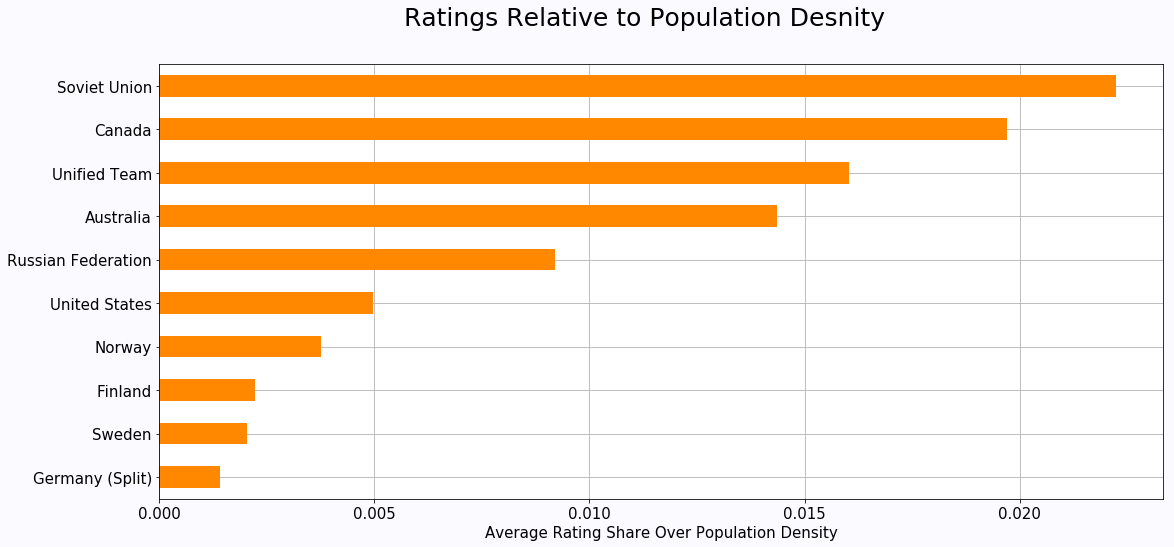

In [76]:
fig, ax = plt.subplots(facecolor='#fafaff')

ten.sort_values().plot(kind='barh',ax=ax,color='#ff8800')


plt.grid()
plt.ylabel('')
plt.xlabel('Average Rating Share Over Population Density')
ax.set_axisbelow(True)
fig.suptitle('Ratings Relative to Population Desnity', fontsize=25)
plt.show()

fig.savefig('../../data/final/Graphs/AveRatingPerDensity.png')

# Population Effect Overall

** Line of Best Fit **

In [77]:
# Linear Regression 
x = df1.Norm_Rating_Share
y = df1.Norm_POP
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

** Correlation Between Rating Share and GDP **

In [78]:
# The correlation between GDP and Rating Share 
df1.Norm_Rating_Share.corr(df1.Norm_POP)

0.17089131109371064

** Graphing GDPs effect on Rating Share ** 

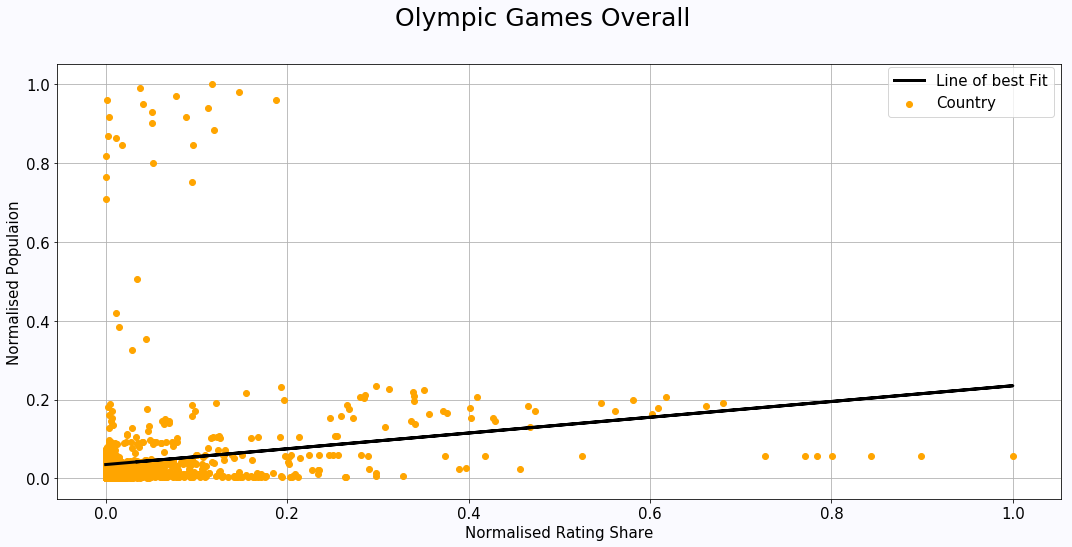

In [79]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='Orange')
plt.legend()
plt.grid()
plt.xlabel('Normalised Rating Share')
plt.ylabel('Normalised Populaion')
fig.suptitle('Olympic Games Overall', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)
plt.show()
fig.savefig('../../data/final/Graphs/Population_EffectOVerall.png')

# GDP effect over Individual Games
We first calculate the correlation between Population and rating share for every olympics by themsevles. To do this we normailze the Population values using Min-max nomralisation just for the Population values of each given olympics seperately and we get the correlation of the nomralised Population values and the nomralised rating share for each Olympics individually then we get an average correlation of all the individual correlations of each games.  


In [80]:
# Quickly getting all the names of the summer and winter olympics 
winter_list =[]
summer_list =[]

for x, row in df1.iterrows():
    
    city = df1['Host_City'].iloc[x]
    typeG = df1['Summer'].iloc[x]
    
    if(typeG == False):
        winter_list.append(city)
    else:
        summer_list.append(city)    

# getting only unique values for the games         
summer_list = list(set(summer_list))
winter_list = list(set(winter_list))

In [81]:
# creating two dictionaries to record the correlations 
WcorrPopDict = {}
ScorrPopDict = {}
OcorrPopDict = {}
# We'll also create dfs each with there nomralised values 
sumdf = pd.DataFrame()
windf = pd.DataFrame()

In [82]:
# Getting the correlation between Population and rating share for all the winter games 
warnings.filterwarnings('ignore')
for i in range(len(winter_list)):
    
    temp  = df1[df1['Host_City'] == winter_list[i]] 
    # min and max values 
    maxPop = temp['Population'].max()
    minPop = temp['Population'].min()
    temp['Norm_POP'] = (temp['Population'] - minPop) / (maxPop - minPop) 
    # min and max values 
    maxTRate = temp['Rating_Share'].max()
    minTRate = temp['Rating_Share'].min()
    # The correlation between GDP and Rating Share 
    corr  = temp.Norm_Rating_Share.corr(temp.Norm_POP) 
    WcorrPopDict.update({winter_list[i]: corr})
    
    # Creating the winter df
    
    windf = pd.concat([temp, windf])
    
wAvgCorr = np.mean(list(WcorrPopDict.values()))

In [120]:
# Getting the correlation between Population and rating share for all the summer games 
warnings.filterwarnings('ignore')
for i in range(len(summer_list)):
    
    temp  = df1[df1['Host_City'] == summer_list[i]] 
    # min and max values 
    maxPop = temp['Population'].max()
    minPop = temp['Population'].min()
    temp['Norm_POP'] = (temp['Population'] - minPop) / (maxPop - minPop) 

    # The correlation between GDP and Rating Share 
    corr  = temp.Norm_Rating_Share.corr(temp.Norm_POP) 
    ScorrPopDict.update({summer_list[i]: corr})
    
        # Creating the winter df
    
    sumdf = pd.concat([temp, sumdf])
    
sAvgCorr = np.mean(list(ScorrPopDict.values()))

In [121]:
# Getting the correlation between Population and rating share for all the summer and winter games 
city_list = summer_list + winter_list
warnings.filterwarnings('ignore')
for i in range(len(city_list)):
    
    temp  = df1[df1['Host_City'] == city_list[i]] 
    # min and max values 
    # min and max values 
    maxPop = temp['Population'].max()
    minPop = temp['Population'].min()
    temp['Norm_POP'] = (temp['Population'] - minPop) / (maxPop - minPop)  

    # The correlation between GDP and Rating Share 
    corr  = temp.Norm_Rating_Share.corr(temp.Norm_POP) 
    OcorrPopDict.update({city_list[i]: corr})
OAvgCorr = np.mean(list(OcorrPopDict.values()))

In [122]:
# Summer and Winter Games average GDP and Rating share correlation 
OAvgCorr

0.30434085118771986

In [123]:
# Summer Games average GDP and Rating share correlation 
sAvgCorr

0.33440368647170743

In [124]:
# Summer Games average GDP and Rating share correlation 
wAvgCorr

-0.1860428488463082

# Graphing the Results 

# Summer Games

In [125]:
# Linear Regression
# The calculation below give us the data needed to plot the line of best fit for the GDP rating analysis
x = sumdf.Norm_Rating_Share
y = sumdf.Norm_POP
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [126]:
# The correlation between GDP and Rating Share 
sumdf.Norm_Rating_Share.corr(sumdf.Norm_POP)

0.28025080819610759

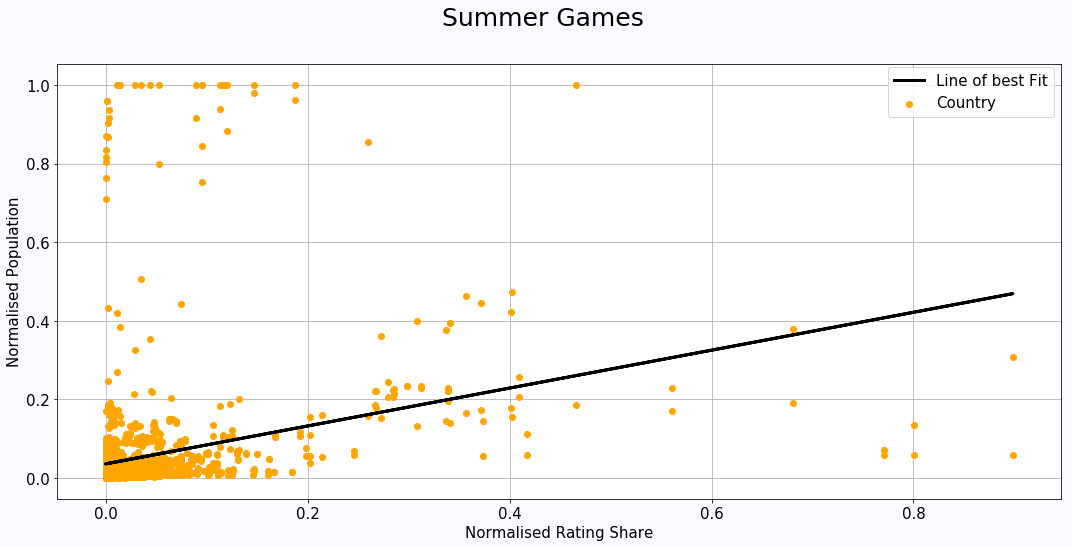

In [127]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='Orange')
plt.legend()
plt.grid()
plt.xlabel('Normalised Rating Share')
plt.ylabel('Normalised Population')
fig.suptitle('Summer Games', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)


plt.show()
fig.savefig('../../data/final/Graphs/Pop_SUMEffect.png')

In [91]:
ScorrPopDict

{'Athens': 0.26426423046197872,
 'Atlanta': 0.29968616398357734,
 'Barcelone': 0.36527759662348414,
 'Beijing': 0.39723210116431801,
 'London': 0.34725759660261651,
 'Los Angeles': 0.28989502318704929,
 'Mexico': 0.37034803511429942,
 'Montréal': 0.53725383301257312,
 'Moscow': 0.29376620447771595,
 'Munich': 0.25387095163756213,
 'Rio': 0.27511354912297897,
 'Rome': 0.45229528455885137,
 'Seoul': 0.18023401025777241,
 'Sydney': 0.22700075680217405,
 'Tokyo': 0.46255996006866029}

In [92]:
WcorrPopDict

{'Albertville': -0.052149791211806171,
 'Calgary': 0.40195242497497946,
 'Grenoble': 0.5149146938298591,
 'Innsbruck': 0.4614623493737513,
 'Lake Placid': 0.58588279467141358,
 'Lillehammer': -0.12591586493378265,
 'Nagano': 0.029427172566939608,
 'Salt Lake City': 0.062662099073300864,
 'Sapporo': 0.67075541812064754,
 'Sarajevo': 0.40060994631578639,
 'Sochi': -0.0034020911505112566,
 'Squaw Valley': 0.76818847227216902,
 'Turin': -0.023080814966282982,
 'Vancouver': 0.11852257843179975}

In [93]:
# Creating a dictionary of all the games and there years
Dict = {}
df4 = df1.drop_duplicates(subset=['Host_City', 'Year']).reset_index()
for x, row in df4.iterrows():
    
    
    year = df4['Year'].iloc[x]
    host_city = df4['Host_City'].iloc[x]
    
    Dict.update({host_city: year})

In [94]:
# Creating tables of the correlations

sumCorrdf = pd.DataFrame(columns=['Host_City', 'Year', 'Correlation'])
winCorrdf = pd.DataFrame(columns=['Host_City', 'Year', 'Correlation'])

sumCorrdf['Host_City'] =  list(ScorrPopDict.keys())
winCorrdf['Host_City'] =  list(WcorrPopDict.keys())

for x, row in sumCorrdf.iterrows():
    
    host_city = sumCorrdf['Host_City'].iloc[x]
    
    sumCorrdf.loc[x, 'Year'] = Dict[host_city]
    sumCorrdf.loc[x, 'Correlation'] = ScorrPopDict[host_city] 
    
    
for x, row in winCorrdf.iterrows():
    
    host_city = winCorrdf['Host_City'].iloc[x]
    
    winCorrdf.loc[x, 'Year'] = Dict[host_city]
    winCorrdf.loc[x, 'Correlation'] = WcorrPopDict[host_city] 


sumCorrdf = sumCorrdf.sort_values(by=['Correlation'], ascending=False).reset_index()
# Dropping the old index 
sumCorrdf = sumCorrdf.drop(sumCorrdf.columns[[0]], axis=1)
winCorrdf = winCorrdf.sort_values(by=['Correlation'], ascending=False).reset_index()
# Dropping the old index 
winCorrdf = winCorrdf.drop(winCorrdf.columns[[0]], axis=1)

In [95]:
sumCorrdf.to_csv(r"..\..\data\final\summerCorrelationPop.csv", index=False)
sumCorrdf

,Host_City,Year,Correlation
0,Montréal,1976,0.537254
1,Tokyo,1964,0.46256
2,Rome,1960,0.452295
3,Beijing,2008,0.397232
4,Mexico,1968,0.370348
5,Barcelone,1992,0.365278
6,London,2012,0.347258
7,Atlanta,1996,0.299686
8,Moscow,1980,0.293766
9,Los Angeles,1984,0.289895


In [96]:
winCorrdf.to_csv(r"..\..\data\final\winterCorrelationPop.csv", index=False)
winCorrdf

,Host_City,Year,Correlation
0,Squaw Valley,1960,0.768188
1,Sapporo,1972,0.670755
2,Lake Placid,1980,0.585883
3,Grenoble,1968,0.514915
4,Innsbruck,1976,0.461462
5,Calgary,1988,0.401952
6,Sarajevo,1984,0.40061
7,Vancouver,2010,0.118523
8,Salt Lake City,2002,0.0626621
9,Nagano,1998,0.0294272


# Winter Games 

In [97]:
# Linear Regression
# The calculation below give us the data needed to plot the line of best fit for the GDP rating analysis
x = windf.Norm_Rating_Share
y = windf.Norm_POP
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
# The correlation between GDP and Rating Share 
windf.Norm_Rating_Share.corr(windf.Norm_POP)

0.3840560071974104

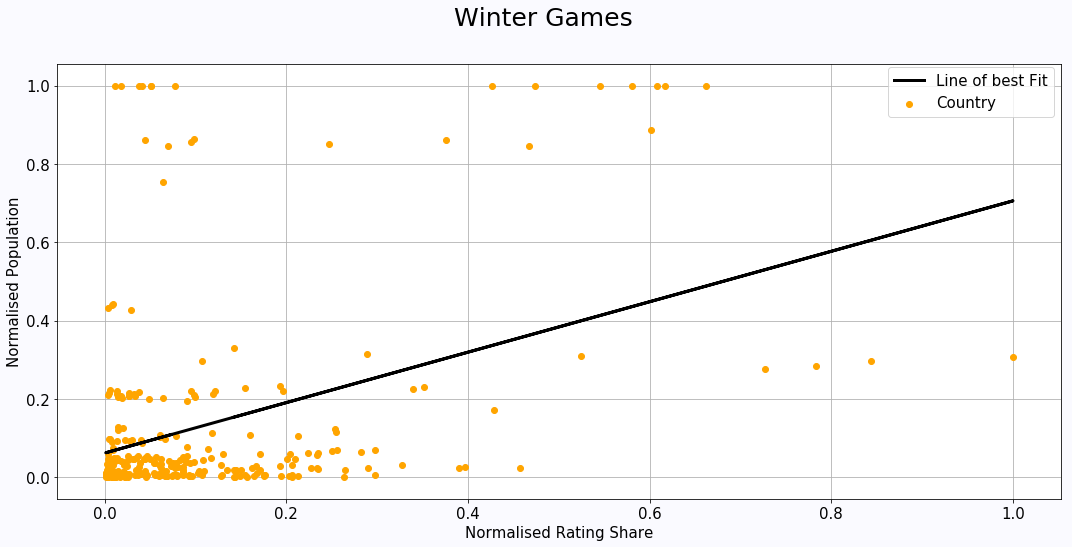

In [99]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='Orange')
plt.legend()
plt.grid()
plt.xlabel('Normalised Rating Share')
plt.ylabel('Normalised Population')
fig.suptitle('Winter Games', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)


plt.show()
fig.savefig('../../data/final/Graphs/Pop_WINEffect.png')

# Population Density Analysis 
After looking at Population with Rating shares the best next step would be to look at Population Density as judging from the Ratings relative graphs from above should yield different results. 

** Population Density effect on Ratings Share ** 

In [100]:
# Linear Regression 
x = df1.Norm_Rating_Share
y = df1.Norm_POPD
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

** GDP Per Capitas Correlation with Rating Share ** 

In [101]:
# The correlation between GDP and Rating Share 
df1.Norm_Rating_Share.corr(df1.Norm_POPD)

-0.04638453077587408

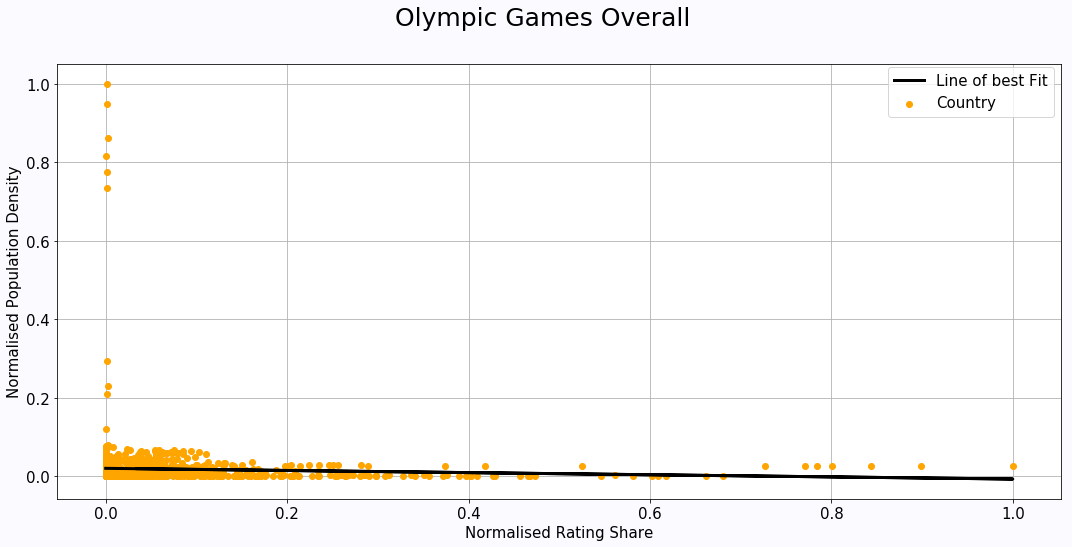

In [102]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='Orange')
plt.legend()
plt.grid()
plt.xlabel('Normalised Rating Share')
plt.ylabel('Normalised Population Density')
fig.suptitle('Olympic Games Overall', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)


plt.show()
fig.savefig('../../data/final/Graphs/POPDEffect.png')

# Population Density Effect Summary 
Population Desnity interestingly has a negative effect on rating share. This result is kind of expected as countries with high population densities may have probelms with sharing resources. 

# GDP Per Capita effect over Individual Games

In [103]:
# creating two dictionaries to record the correlations 
WcorrPopDDict = {}
ScorrPopDDict = {}
OcorrPopDDict = {}
# We'll also create dfs each with there nomralised values 
sumdf = pd.DataFrame()
windf = pd.DataFrame()

In [104]:
# Getting the correlation between Population Density and rating share for all the winter games 
warnings.filterwarnings('ignore')
for i in range(len(winter_list)):
    
    temp  = df1[df1['Host_City'] == winter_list[i]] 
    # min and max values 
    maxPOPD = temp['Population_Density'].max()
    minPOPD = temp['Population_Density'].min()
    temp['Norm_POPD'] = (temp['Population_Density'] - minPOPD) / (maxPOPD - minPOPD) 

    
    # The correlation between GDP and Rating Share 
    corr  = temp.Norm_Rating_Share.corr(temp.Norm_POPD) 
    WcorrPopDDict.update({winter_list[i]: corr})
    
    # Creating the winter df
    
    windf = pd.concat([temp, windf])
    
wAvgCorr = np.mean(list(WcorrPopDDict.values()))

In [105]:
# Getting the correlation between Population Density and rating share for all the summer games 
warnings.filterwarnings('ignore')
for i in range(len(summer_list)):
    
    temp  = df1[df1['Host_City'] == summer_list[i]] 
    # min and max values 
    maxPOPD = temp['Population_Density'].max()
    minPOPD = temp['Population_Density'].min()
    temp['Norm_POPD'] = (temp['Population_Density'] - minPOPD) / (maxPOPD - minPOPD) 

    
    # The correlation between GDP and Rating Share 
    corr  = temp.Norm_Rating_Share.corr(temp.Norm_POPD) 
    ScorrPopDDict.update({summer_list[i]: corr})
    
        # Creating the winter df
    
    sumdf = pd.concat([temp, sumdf])
    
sAvgCorr = np.mean(list(ScorrPopDDict.values()))

In [106]:
# Getting the correlation between Population Density and rating share for all the summer and winter games 
city_list = summer_list + winter_list
warnings.filterwarnings('ignore')
for i in range(len(city_list)):
    
    temp  = df1[df1['Host_City'] == city_list[i]] 
    # min and max values 
    maxPOPD = temp['Population_Density'].max()
    minPOPD = temp['Population_Density'].min()
    temp['Norm_POPD'] = (temp['Population_Density'] - minPOPD) / (maxPOPD - minPOPD) 

    
    # The correlation between GDP and Rating Share 
    corr  = temp.Norm_Rating_Share.corr(temp.Norm_POPD) 
    OcorrPopDDict.update({city_list[i]: corr})
OAvgCorr = np.mean(list(OcorrPopDDict.values()))

In [107]:
# Summer and Winter Games average GDP Per capita and Rating share correlation 
OAvgCorr

-0.09343995229739864

In [108]:
# Summer Games average GDP Per capita and Rating share correlation 
sAvgCorr

-0.0070105821850830578

In [109]:
# Summer Games average GDP Per capita  and Rating share correlation 
wAvgCorr

-0.1860428488463082

# Graphing the Results 

# Summer Games 

In [110]:
# Linear Regression
# The calculation below give us the data needed to plot the line of best fit for the GDP rating analysis
x = sumdf.Norm_Rating_Share
y = sumdf.Norm_POPD
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
# The correlation between GDP and Rating Share 
sumdf.Norm_Rating_Share.corr(sumdf.Norm_POPD)

0.063535719253573583

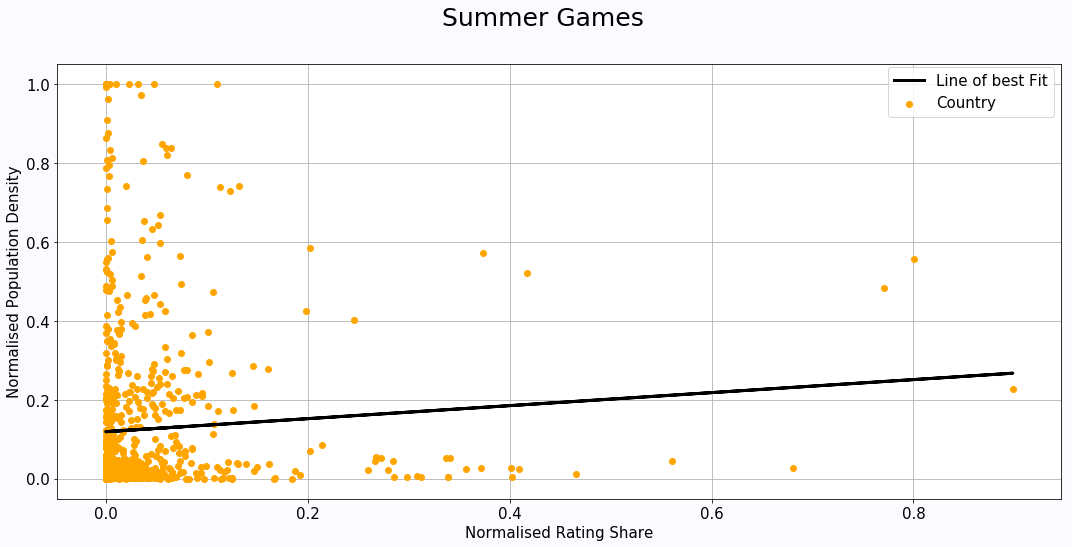

In [112]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='Orange')
plt.legend()
plt.grid()
plt.xlabel('Normalised Rating Share')
plt.ylabel('Normalised Population Density')
fig.suptitle('Summer Games', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)


plt.show()
fig.savefig('../../data/final/Graphs/PopD_SUMEffect.png')

# Creating the correlation Tables

In [113]:
# Creating tables of the correlations

sumCorrdf = pd.DataFrame(columns=['Host_City', 'Year', 'Correlation'])
winCorrdf = pd.DataFrame(columns=['Host_City', 'Year', 'Correlation'])

sumCorrdf['Host_City'] =  list(ScorrPopDDict.keys())
winCorrdf['Host_City'] =  list(WcorrPopDDict.keys())

for x, row in sumCorrdf.iterrows():
    
    host_city = sumCorrdf['Host_City'].iloc[x]
    
    sumCorrdf.loc[x, 'Year'] = Dict[host_city]
    sumCorrdf.loc[x, 'Correlation'] = ScorrPopDDict[host_city] 
    
    
for x, row in winCorrdf.iterrows():
    
    host_city = winCorrdf['Host_City'].iloc[x]
    
    winCorrdf.loc[x, 'Year'] = Dict[host_city]
    winCorrdf.loc[x, 'Correlation'] = WcorrPopDDict[host_city] 


sumCorrdf = sumCorrdf.sort_values(by=['Correlation'], ascending=False).reset_index()
# Dropping the old index 
sumCorrdf = sumCorrdf.drop(sumCorrdf.columns[[0]], axis=1)
winCorrdf = winCorrdf.sort_values(by=['Correlation'], ascending=False).reset_index()
# Dropping the old index 
winCorrdf = winCorrdf.drop(winCorrdf.columns[[0]], axis=1)

In [115]:
sumCorrdf.to_csv(r"..\..\data\final\summerCorrelationPopD.csv", index=False)
sumCorrdf

,Host_City,Year,Correlation
0,Munich,1972,0.123214
1,Seoul,1988,0.103931
2,Tokyo,1964,0.0667895
3,Barcelone,1992,0.0202432
4,Mexico,1968,0.011705
5,Los Angeles,1984,-0.0107879
6,Sydney,2000,-0.0129681
7,Moscow,1980,-0.0215954
8,Montréal,1976,-0.0278298
9,Beijing,2008,-0.0348164


In [116]:
winCorrdf.to_csv(r"..\..\data\final\winterCorrelationPopD.csv", index=False)
winCorrdf

,Host_City,Year,Correlation
0,Sapporo,1972,-0.0321512
1,Sarajevo,1984,-0.0661912
2,Lake Placid,1980,-0.0985977
3,Calgary,1988,-0.101148
4,Innsbruck,1976,-0.125586
5,Grenoble,1968,-0.147108
6,Turin,2006,-0.164983
7,Lillehammer,1994,-0.182926
8,Vancouver,2010,-0.192686
9,Sochi,2014,-0.19409


# Winter Games 

In [117]:
# Linear Regression
# The calculation below give us the data needed to plot the line of best fit for the GDP rating analysis
x = windf.Norm_Rating_Share
y = windf.Norm_POPD
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [118]:
# The correlation between GDP and Rating Share 
windf.Norm_Rating_Share.corr(windf.Norm_POPD)

-0.14062905493390429

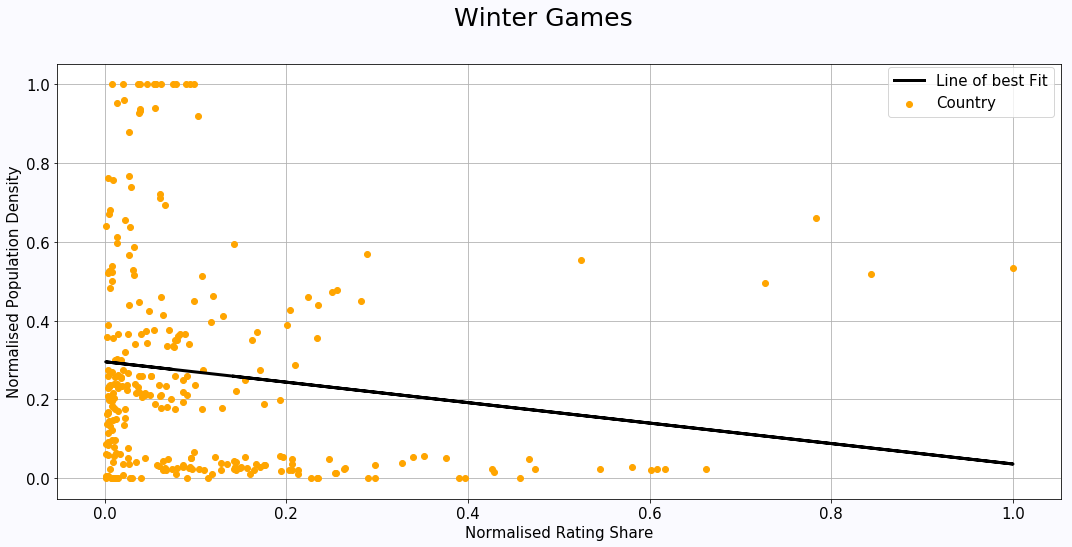

In [119]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='Orange')
plt.legend()
plt.grid()
plt.xlabel('Normalised Rating Share')
plt.ylabel('Normalised Population Density')
fig.suptitle('Winter Games', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)


plt.show()
fig.savefig('../../data/final/Graphs/PopD_WINEffect.png')